<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/milmor/NLP/blob/main/Notebooks/01_Tf-idf.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
</table>

# Tf-idf

In [1]:
import numpy as np

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# datos
X = ["Lobos Gatos Elefantes",
     "Lobos Lobos Caballos Teatro",
     "Lobos Elefantes Lobos",
     "Computadora Procesador Lobos",
     "Teatro Pintura Elefantes",
     "Teatro Música Caballos Teatro Teatro"]
y = [0, 0, 0, 1, 2, 2]

vectorizer = TfidfVectorizer(norm=None)
X_vect = vectorizer.fit_transform(X)

In [4]:
X_vect

<6x9 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [5]:
X_vect.toarray()

array([[0.        , 0.        , 1.55961579, 2.25276297, 1.33647224,
        0.        , 0.        , 0.        , 0.        ],
       [1.84729786, 0.        , 0.        , 0.        , 2.67294447,
        0.        , 0.        , 0.        , 1.55961579],
       [0.        , 0.        , 1.55961579, 0.        , 2.67294447,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.25276297, 0.        , 0.        , 1.33647224,
        0.        , 0.        , 2.25276297, 0.        ],
       [0.        , 0.        , 1.55961579, 0.        , 0.        ,
        0.        , 2.25276297, 0.        , 1.55961579],
       [1.84729786, 0.        , 0.        , 0.        , 0.        ,
        2.25276297, 0.        , 0.        , 4.67884736]])

In [6]:
vectorizer.vocabulary_

{'lobos': 4,
 'gatos': 3,
 'elefantes': 2,
 'caballos': 0,
 'teatro': 8,
 'computadora': 1,
 'procesador': 7,
 'pintura': 6,
 'música': 5}

In [7]:
vectorizer.idf_

array([1.84729786, 2.25276297, 1.55961579, 2.25276297, 1.33647224,
       2.25276297, 2.25276297, 2.25276297, 1.55961579])

- Aquí tf denota la frecuencia del término y tf-idf es la frecuencia del término por la frecuencia inversa de documento. La frecuencia del termino es el número de veces que el término ocurre en el documento.

$$ \text{tf-idf}(t, d) = \text{tf}(t,d) \times \text{idf}(t)$$
$$ \text{idf}(t) = \log\frac{1 + n}{1 + \text{df}(t)} + 1$$
donde $n$ es el número total de documentos y $\text{df}(t)$ es el número total de documentos que contienen el término $t$.

Para la palabra "Lobos" con el índice de vocabulario es 4:

$$ \text{idf(lobos)} = \log\frac{1 + 6}{1 + 4} + 1 = 1.33$$

In [8]:
np.log(7/4) + 1

1.5596157879354227

In [9]:
np.log(7/5) + 1, vectorizer.idf_[4]

(1.336472236621213, 1.336472236621213)

- En el primer documento, la palabra "lobos" aparece una vez, por lo que tf(lobos, 0) = 1 y tf-idf(lobos, 0) = $1 \times 1.33 = 1.33$

- En el segundo documento, la palabra "lobos" aparece dos veces, por lo que tf(lobos, 1) = 2 y tf-idf(lobos, 1) = $2 \times 1.33 = 2.67$

In [10]:
X_vect.toarray()[:, 4]

array([1.33647224, 2.67294447, 2.67294447, 1.33647224, 0.        ,
       0.        ])

- Normalizando

In [11]:
from numpy import linalg as LA

In [12]:
l2_norm = LA.norm([0., 0., 1.55961579, 2.25276297, 1.33647224, 0., 0., 0., 0.])
l2_norm

3.0485243085321074

In [13]:
X_vect.toarray()[0] / l2_norm

array([0.        , 0.        , 0.51159697, 0.73896835, 0.43839973,
       0.        , 0.        , 0.        , 0.        ])

- Normalizando con TfidfVectorizer

In [14]:
vectorizer = TfidfVectorizer(norm='l2')
X_vect = vectorizer.fit_transform(X)
X_vect.toarray()

array([[0.        , 0.        , 0.51159697, 0.73896835, 0.43839973,
        0.        , 0.        , 0.        , 0.        ],
       [0.51255443, 0.        , 0.        , 0.        , 0.74163976,
        0.        , 0.        , 0.        , 0.43273367],
       [0.        , 0.        , 0.50396702, 0.        , 0.8637229 ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.65205671, 0.        , 0.        , 0.3868386 ,
        0.        , 0.        , 0.65205671, 0.        ],
       [0.        , 0.        , 0.49468646, 0.        , 0.        ,
        0.        , 0.71454223, 0.        , 0.49468646],
       [0.33515812, 0.        , 0.        , 0.        , 0.        ,
        0.40872228, 0.        , 0.        , 0.84889053]])

- Para utilizar TfidfVectorizer con datos de prueba utilizar únicamente el método __transform__

In [15]:
X = ["Lobos Computadora Elefantes"]

X_vect = vectorizer.transform(X)
X_vect.toarray()

array([[0.        , 0.73896835, 0.51159697, 0.        , 0.43839973,
        0.        , 0.        , 0.        , 0.        ]])

# Document vectors

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


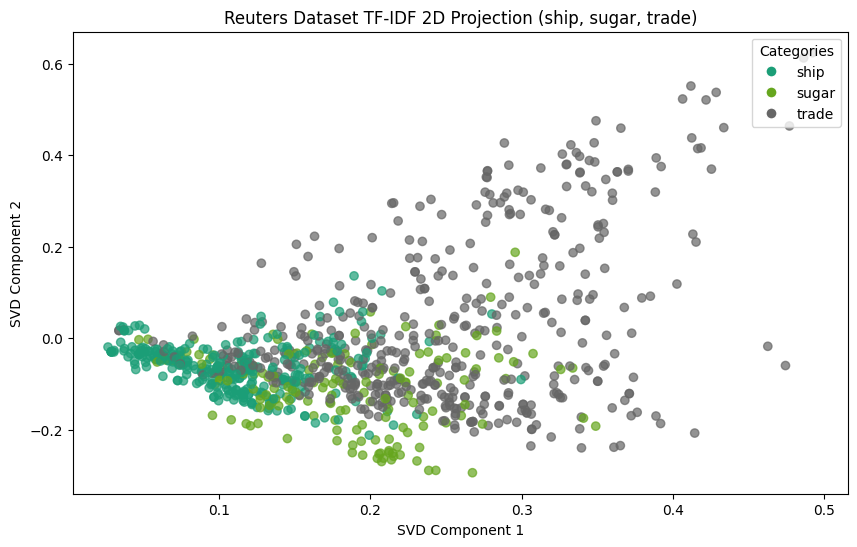

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from collections import Counter

# Download Reuters dataset
nltk.download('reuters')
nltk.download('punkt')

# Select two categories to include
selected_categories = {"sugar", "ship", "trade"}  # Change these to any two categories

# Load documents and filter only selected categories
documents = [doc for doc in reuters.fileids() if set(reuters.categories(doc)) & selected_categories]
texts = [" ".join(reuters.words(doc)) for doc in documents]
categories = [next(iter(set(reuters.categories(doc)) & selected_categories)) for doc in documents]  # Get first matching category

# Convert text to TF-IDF representation
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)

# Reduce to 2D using Truncated SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X_tfidf)

# Assign numerical labels to the two categories
category_to_idx = {cat: idx for idx, cat in enumerate(selected_categories)}
labels = np.array([category_to_idx[cat] for cat in categories])

# Plot results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='Dark2', alpha=0.7)

# Create legend
legend_labels = {category_to_idx[cat]: cat for cat in selected_categories}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(idx)), markersize=8)
           for idx in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), title="Categories", loc='upper right')


plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title(f"Reuters Dataset TF-IDF 2D Projection ({', '.join(selected_categories)})")
plt.show()


In [17]:
texts[0], categories[0]

('ASIAN EXPORTERS FEAR DAMAGE FROM U . S .- JAPAN RIFT Mounting trade friction between the U . S . And Japan has raised fears among many of Asia \' s exporting nations that the row could inflict far - reaching economic damage , businessmen and officials said . They told Reuter correspondents in Asian capitals a U . S . Move against Japan might boost protectionist sentiment in the U . S . And lead to curbs on American imports of their products . But some exporters said that while the conflict would hurt them in the long - run , in the short - term Tokyo \' s loss might be their gain . The U . S . Has said it will impose 300 mln dlrs of tariffs on imports of Japanese electronics goods on April 17 , in retaliation for Japan \' s alleged failure to stick to a pact not to sell semiconductors on world markets at below cost . Unofficial Japanese estimates put the impact of the tariffs at 10 billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of produc

In [18]:
texts[-1], categories[-1]

('MULFORD SAYS GERMANY , JAPAN SHOULD DO MORE Treasury Assistant Secretary David Mulford said he did not believe that West Germany and Japan have yet carried out their international responsibilities . " I do not believe they have up to this time ," Mulford told a Senate banking subcommittee . He said that for the U . S . trade deficit to continue improving in the next two years , " We need more policy actions " across the entire front of U . S . trade relations , including Canada and the newly - industrialized countries ( NICS ). In particular , he said , efforts by South Korea and Taiwan to strengthen their currencies were still disappointing . Mulford also said that OECD nations need to grow an average three pct to help resolve the international debt crisis . He noted that Japanese and European imports from Latin nations were significantly smaller than imports into the U . S . He stressed both Germany and Japan must continue to take economic and structural measures to ensure stronger

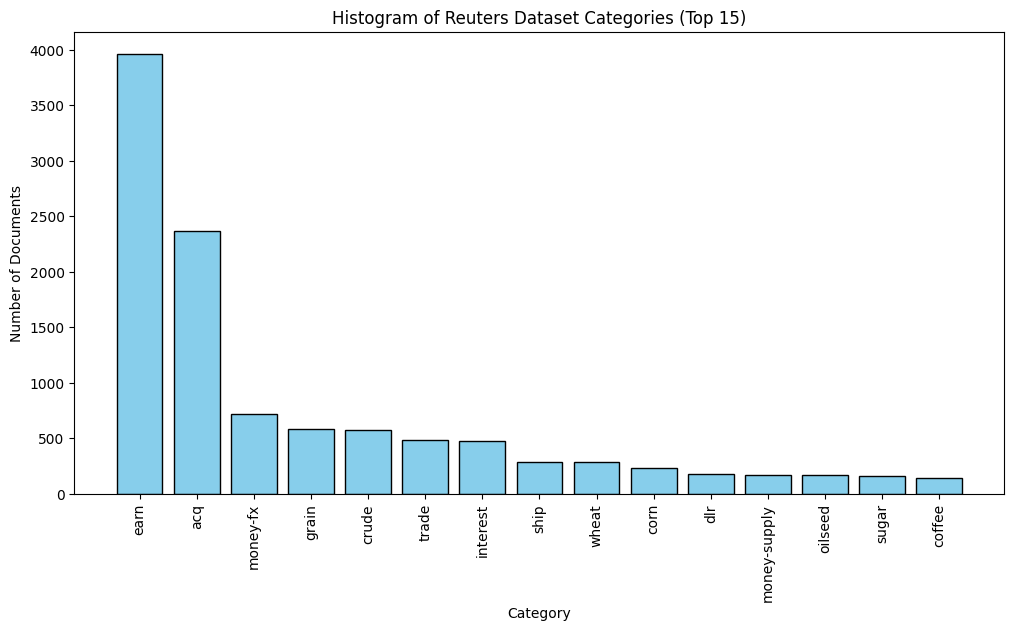

In [19]:
# Variable to control how many categories to show
num_categories_to_show = 15  # Change this to 15, 20, etc.

# Count occurrences of each category
category_counts = Counter(cat for doc in reuters.fileids() for cat in reuters.categories(doc))

# Sort categories by frequency
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

# Select only the top `num_categories_to_show`
categories, frequencies = zip(*sorted_categories[:num_categories_to_show])

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(categories, frequencies, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of Documents")
plt.title(f"Histogram of Reuters Dataset Categories (Top {num_categories_to_show})")
plt.show()
